In [2]:
// Example displaying two histograms and their ratio.
// Author: Olivier Couet
//void ratioplot() {
   // Define two gaussian histograms. Note the X and Y title are defined
   // at booking time using the convention "Hist_title ; X_title ; Y_title"
   TH1F *h1 = new TH1F("h1", "Two gaussian plots and their ratio;x title; h1 and h2 gaussian histograms", 100, -5, 5);
   TH1F *h2 = new TH1F("h2", "h2", 100, -5, 5);
   h1->FillRandom("gaus");
   h2->FillRandom("gaus");

   // Define the Canvas
   TCanvas *c = new TCanvas("c", "canvas", 800, 800);

   // Upper plot will be in pad1
   TPad *pad1 = new TPad("pad1", "pad1", 0, 0.3, 1, 1.0);
   pad1->SetBottomMargin(0); // Upper and lower plot are joined
   pad1->SetGridx();         // Vertical grid
   pad1->Draw();             // Draw the upper pad: pad1
   pad1->cd();               // pad1 becomes the current pad
   h1->SetStats(0);          // No statistics on upper plot
   h1->Draw();               // Draw h1
   h2->Draw("same");         // Draw h2 on top of h1

   // Do not draw the Y axis label on the upper plot and redraw a small
   // axis instead, in order to avoid the first label (0) to be clipped.
   h1->GetYaxis()->SetLabelSize(0.);
   TGaxis *axis = new TGaxis( -5, 20, -5, 220, 20,220,510,"");
   axis->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   axis->SetLabelSize(15);
   axis->Draw();

   // lower plot will be in pad
   c->cd();          // Go back to the main canvas before defining pad2
   TPad *pad2 = new TPad("pad2", "pad2", 0, 0.05, 1, 0.3);
   pad2->SetTopMargin(0);
   pad2->SetBottomMargin(0.2);
   pad2->SetGridx(); // vertical grid
   pad2->Draw();
   pad2->cd();       // pad2 becomes the current pad

   // Define the ratio plot
   TH1F *h3 = (TH1F*)h1->Clone("h3");
   h3->SetLineColor(kBlack);
   h3->SetMinimum(0.8);  // Define Y ..
   h3->SetMaximum(1.35); // .. range
   h3->Sumw2();
   h3->SetStats(0);      // No statistics on lower plot
   h3->Divide(h2);
   h3->SetMarkerStyle(21);
   h3->Draw("ep");       // Draw the ratio plot

   // h1 settings
   h1->SetLineColor(kBlue+1);
   h1->SetLineWidth(2);

   // Y axis h1 plot settings
   h1->GetYaxis()->SetTitleSize(20);
   h1->GetYaxis()->SetTitleFont(43);
   h1->GetYaxis()->SetTitleOffset(1.55);

   // h2 settings
   h2->SetLineColor(kRed);
   h2->SetLineWidth(2);

   // Ratio plot (h3) settings
   h3->SetTitle(""); // Remove the ratio title

   // Y axis ratio plot settings
   h3->GetYaxis()->SetTitle("ratio h1/h2 ");
   h3->GetYaxis()->SetNdivisions(505);
   h3->GetYaxis()->SetTitleSize(20);
   h3->GetYaxis()->SetTitleFont(43);
   h3->GetYaxis()->SetTitleOffset(1.55);
   h3->GetYaxis()->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   h3->GetYaxis()->SetLabelSize(15);

   // X axis ratio plot settings
   h3->GetXaxis()->SetTitleSize(20);
   h3->GetXaxis()->SetTitleFont(43);
   h3->GetXaxis()->SetTitleOffset(4.);
   h3->GetXaxis()->SetLabelFont(43); // Absolute font size in pixel (precision 3)
   h3->GetXaxis()->SetLabelSize(15);


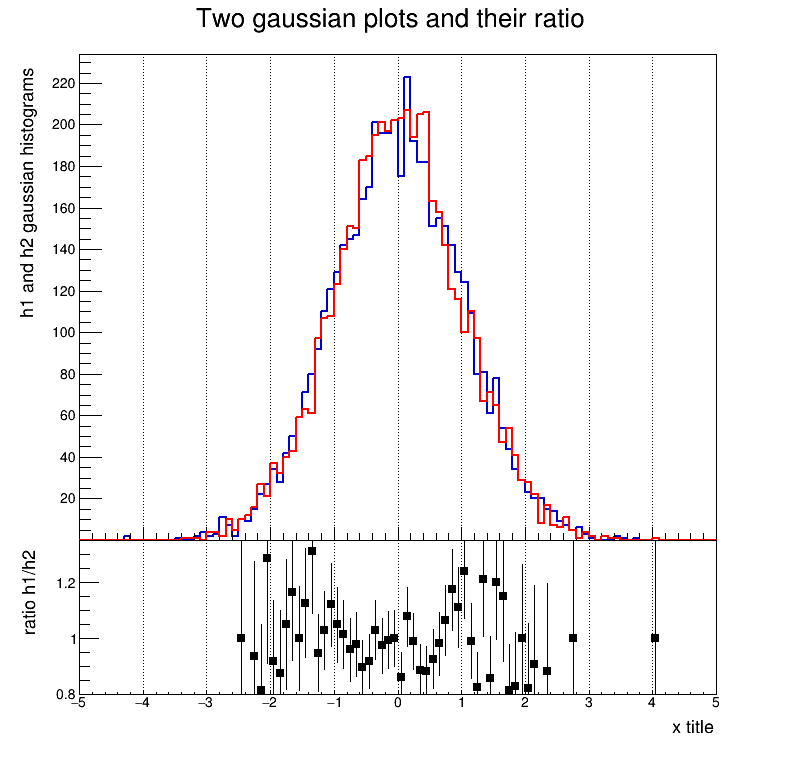

In [3]:
c->Draw()